In [41]:
import numpy as np
import pandas as pd
import cv2

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import os
import math

from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense

import scikitplot
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report

In [10]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [11]:
labels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise']

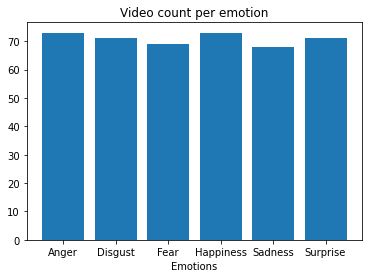

In [12]:
video_counts = []
video_lengths = []
video_avg_lengths = []
video_min_lengths = []
video_max_lengths = []
for label in labels:
    folder = 'C:/data/train/%s/' % label
    files = os.listdir(folder)
    video_counts.append(len(files))
    lens = []
    for file in files:
        vidcap = cv2.VideoCapture(folder + "/" + file)
        length = vidcap.get(cv2.CAP_PROP_FRAME_COUNT)
        lens.append(length)
    video_lengths.append(sum(lens))
    video_avg_lengths.append(sum(lens) / len(files))
    video_min_lengths.append(min(lens))
    video_max_lengths.append(max(lens))
video_counts
fig, ax = plt.subplots()
ax.bar(labels, video_counts, align='center')
ax.set_xlabel('Emotions')
ax.set_title('Video count per emotion')

plt.show()

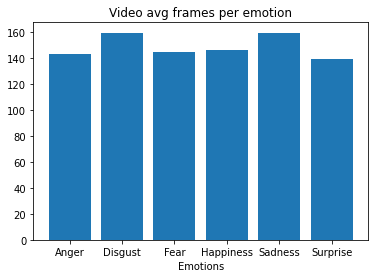

In [13]:
fig, ax = plt.subplots()
ax.bar(labels, video_avg_lengths, align='center')
ax.set_xlabel('Emotions')
ax.set_title('Video avg frames per emotion')

plt.show()

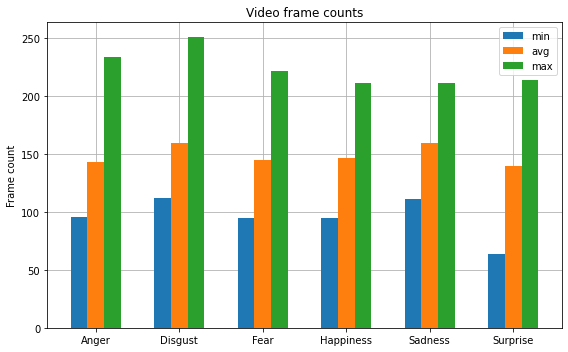

In [14]:
x = np.arange(len(labels))
width = 0.2 

fig, ax = plt.subplots(figsize=(8,5))
plt.grid(True)
ax.set_axisbelow(True)
rects1 = ax.bar(x - width, video_min_lengths, width, label='min')
rects2 = ax.bar(x, video_avg_lengths, width, label='avg')
rects3 = ax.bar(x + width, video_max_lengths, width, label='max')


ax.set_ylabel('Frame count')
ax.set_title('Video frame counts')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

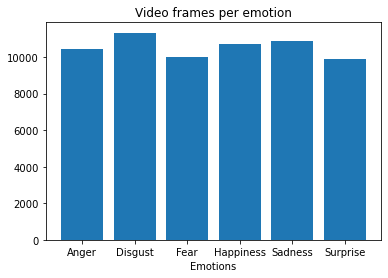

In [15]:
fig, ax = plt.subplots()
ax.bar(labels, video_lengths, align='center')
ax.set_xlabel('Emotions')
ax.set_title('Video frames per emotion')

plt.show()

In [16]:

df = pd.DataFrame(columns=['image','label'])
dfx = {"x": df}
# labels = ['Anger']
print(labels)
for label in labels:
    folder = 'C:/data/train/%s/' % label
    video_files = os.listdir(folder)
    for file in video_files:
        print(file)
        out_folder = 'C:/data/train_images/' + label
        os.makedirs(out_folder,exist_ok=True)
        source = folder + file
        output = out_folder + '/' + file
        frameRate = 4
        start = 0.5
        end = 0.6
        vidcap = cv2.VideoCapture(source)
        length = vidcap.get(cv2.CAP_PROP_FRAME_COUNT)

        def getFrame(frame):
            vidcap.set(cv2.CAP_PROP_POS_FRAMES, frame)
            hasFrames,image = vidcap.read()
            if hasFrames:
                #plt.axis("off")
                #plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                #plt.show()
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                #plt.imshow(gray,cmap='gray')
                #plt.axis("off")
                #plt.show()
                faces = face_cascade.detectMultiScale(gray, 1.3, 5)
                for (x,y,w,h) in faces:
                    os.makedirs(output + '/',exist_ok=True)
                    face_clip = gray[y:y+h, x:x+w]
                    #plt.imshow(face_clip,cmap='gray')
                    #plt.axis("off")
                    #plt.show()
                    face_clip = cv2.resize(face_clip, (48, 48))
                    #plt.imshow(face_clip,cmap='gray')
                    #plt.axis("off")
                    #plt.show()
                    dfx["x"] = dfx["x"].append({'image': face_clip.reshape(48, 48, 1).astype('float32'), 'label': label}, ignore_index = True)
                return hasFrames

        count=1
        c_frame = math.floor(start * length)
        end_frame = math.floor(end * length)
        success = getFrame(c_frame)
        #break
    #break
        while success and c_frame < end_frame:
            count = count + 1
            c_frame = c_frame + frameRate
            success = getFrame(c_frame)
            
df = dfx["x"]

['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise']
trainAnger001.avi
trainAnger002.avi
trainAnger003.avi
trainAnger004.avi
trainAnger005.avi
trainAnger006.avi
trainAnger007.avi
trainAnger008.avi
trainAnger009.avi
trainAnger010.avi
trainAnger011.avi
trainAnger012.avi
trainAnger013.avi
trainAnger014.avi
trainAnger015.avi
trainAnger016.avi
trainAnger017.avi
trainAnger018.avi
trainAnger019.avi
trainAnger020.avi
trainAnger021.avi
trainAnger022.avi
trainAnger023.avi
trainAnger024.avi
trainAnger025.avi
trainAnger026.avi
trainAnger027.avi
trainAnger028.avi
trainAnger029.avi
trainAnger030.avi
trainAnger031.avi
trainAnger032.avi
trainAnger033.avi
trainAnger034.avi
trainAnger035.avi
trainAnger036.avi
trainAnger037.avi
trainAnger038.avi
trainAnger039.avi
trainAnger040.avi
trainAnger041.avi
trainAnger042.avi
trainAnger043.avi
trainAnger044.avi
trainAnger045.avi
trainAnger046.avi
trainAnger047.avi
trainAnger048.avi
trainAnger049.avi
trainAnger050.avi
trainAnger051.avi
trainAnger052.avi

trainSurprise062.avi
trainSurprise063.avi
trainSurprise064.avi
trainSurprise065.avi
trainSurprise066.avi
trainSurprise067.avi
trainSurprise068.avi
trainSurprise069.avi
trainSurprise070.avi
trainSurprise071.avi


In [17]:
le = LabelEncoder()
img_labels = le.fit_transform(df.label)
img_labels = to_categorical(img_labels)

X_train,X_test,y_train,y_test = train_test_split(np.stack(df["image"].to_numpy(), axis=0),img_labels,test_size=0.2,random_state=42)

In [18]:
y_train

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [19]:
X_train = X_train / 255.
X_test = X_test / 255.

img_width = X_train.shape[1]
img_height = X_train.shape[2]
img_depth = X_train.shape[3]
num_classes = y_train.shape[1]

In [20]:
model = Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(img_width, img_height, img_depth),activation='relu',padding='same'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.4))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.4))

model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Flatten(name='flatten'))

model.add(Dense(128,activation='relu'))

model.add(Dropout(0.6))

model.add(Dense( num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='nadam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [36]:
batch_size = 32
epochs = 100

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=18,
    verbose=1,
    restore_best_weights=True,
)

rlrop = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    rlrop,
]

image_generator = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)

image_generator.fit(X_train)

history = model.fit_generator(
    image_generator.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train) / batch_size,
    epochs=epochs,
    callbacks=callbacks
)


Epoch 1/100
53/53 [==============================] - 52s 963ms/step - loss: 0.7331 - accuracy: 0.6906 - val_loss: 0.6234 - val_accuracy: 0.7483
Epoch 2/100
53/53 [==============================] - 51s 952ms/step - loss: 0.7276 - accuracy: 0.7192 - val_loss: 1.3743 - val_accuracy: 0.5828
Epoch 3/100
53/53 [==============================] - 54s 1s/step - loss: 0.7364 - accuracy: 0.7227 - val_loss: 0.6666 - val_accuracy: 0.7413
Epoch 4/100
53/53 [==============================] - 56s 1s/step - loss: 0.6776 - accuracy: 0.7361 - val_loss: 0.5315 - val_accuracy: 0.7855
Epoch 5/100
53/53 [==============================] - 56s 1s/step - loss: 0.6733 - accuracy: 0.7320 - val_loss: 0.4655 - val_accuracy: 0.7972
Epoch 6/100
53/53 [==============================] - 55s 1s/step - loss: 0.7075 - accuracy: 0.7163 - val_loss: 0.6224 - val_accuracy: 0.7879
Epoch 7/100
53/53 [==============================] - 52s 978ms/step - loss: 0.6908 - accuracy: 0.7198 - val_loss: 0.6049 - val_accuracy: 0.7436
Epoc

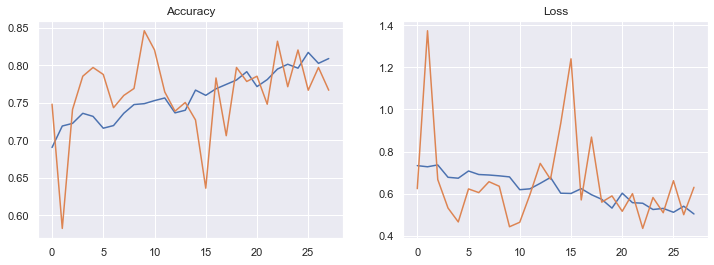

In [44]:
fig = plt.figure(0, (12, 4))

ax = plt.subplot(1, 2, 1)
plt.plot(history.epoch, history.history['accuracy'], label='train')
plt.plot(history.epoch, history.history['val_accuracy'], label='valid')
plt.title('Accuracy')

ax = plt.subplot(1, 2, 2)
plt.plot(history.epoch, history.history['loss'], label='train')
plt.plot(history.epoch, history.history['val_loss'], label='valid')
plt.title('Loss')

plt.show()


In [23]:
# Prediction

In [24]:
images_per_video = []
folder = 'C:/data/test/'
video_files = os.listdir(folder)
for file in video_files:
    print(file)
    source = folder + file
    frameRate = 4
    start = 0.5
    end = 0.6
    vidcap = cv2.VideoCapture(source)
    length = vidcap.get(cv2.CAP_PROP_FRAME_COUNT)

    def getFrame(frame):
        vidcap.set(cv2.CAP_PROP_POS_FRAMES, frame)
        hasFrames,image = vidcap.read()
        if hasFrames:
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray, 1.3, 5)
            for (x,y,w,h) in faces:
                face_clip = gray[y:y+h, x:x+w]
                face_clip = cv2.resize(face_clip, (48, 48))
                images_per_video.append({'image': face_clip.reshape(48, 48, 1).astype('float32'), 'file': file})
                cv2.imwrite('C:/data/test_extracted/' + file + '-' + str(count) + '.jpg', face_clip)
            return hasFrames

    count=1
    c_frame = math.floor(start * length)
    end_frame = math.floor(end * length)
    success = getFrame(c_frame)
    while success and c_frame < end_frame:
        count = count + 1
        c_frame = c_frame + frameRate
        success = getFrame(c_frame)


test001.avi
test002.avi
test003.avi
test004.avi
test005.avi
test006.avi
test007.avi
test008.avi
test009.avi
test010.avi
test011.avi
test012.avi
test013.avi
test014.avi
test015.avi
test016.avi
test017.avi
test018.avi
test019.avi
test020.avi
test021.avi
test022.avi
test023.avi
test024.avi
test025.avi
test026.avi
test027.avi
test028.avi
test029.avi
test030.avi
test031.avi
test032.avi
test033.avi
test034.avi
test035.avi
test036.avi
test037.avi
test038.avi
test039.avi
test040.avi
test041.avi
test042.avi
test043.avi
test044.avi
test045.avi
test046.avi
test047.avi
test048.avi
test049.avi
test050.avi
test051.avi
test052.avi
test053.avi
test054.avi
test055.avi
test056.avi
test057.avi
test058.avi
test059.avi
test060.avi
test061.avi
test062.avi
test063.avi
test064.avi
test065.avi
test066.avi
test067.avi
test068.avi
test069.avi
test070.avi
test071.avi
test072.avi
test073.avi
test074.avi
test075.avi
test076.avi
test077.avi
test078.avi
test079.avi
test080.avi
test081.avi
test082.avi
test083.avi
test

In [25]:
df2 = pd.DataFrame(images_per_video)
images = np.stack(df2["image"].to_numpy(), axis=0)
images = images / 255.0

In [26]:
predicted = model.predict(images)

In [27]:
dict_keys = list(dict(zip(le.classes_, le.transform(le.classes_))).keys())
pred_df = pd.DataFrame(predicted, columns=dict_keys)
merged_df = df2.merge(pred_df, left_index=True, right_index=True)
del merged_df["image"]
merged_df

,file,Anger,Disgust,Fear,Happiness,Sadness,Surprise
0,test001.avi,0.720227,1.102114e-01,0.162161,0.000147,0.007022,0.000231
1,test001.avi,0.741989,5.173589e-02,0.200133,0.000015,0.005994,0.000133
2,test001.avi,0.374777,3.837816e-02,0.493056,0.000155,0.090537,0.003097
3,test001.avi,0.574813,2.424796e-02,0.371681,0.000020,0.028535,0.000703
4,test001.avi,0.623829,2.473184e-02,0.327351,0.000020,0.023410,0.000657
...,...,...,...,...,...,...,...
1327,test270.avi,0.225633,4.911850e-07,0.038456,0.000253,0.001325,0.734332
1328,test270.avi,0.252041,1.028396e-07,0.031527,0.000065,0.001134,0.715233
1329,test270.avi,0.187970,2.659791e-08,0.026604,0.000036,0.000757,0.784633
1330,test270.avi,0.321402,1.223332e-06,0.063042,0.000231,0.004862,0.610462


In [28]:
averaged_df = merged_df.groupby(["file"]).mean()

In [29]:
averaged_df["pred"] = averaged_df[dict_keys].idxmax(axis=1)

In [30]:
averaged_df["f"] = averaged_df.index
averaged_df["File"] = averaged_df.apply(lambda x: os.path.splitext(x["f"])[0],axis=1)

In [31]:
averaged_df[["File", "pred"]]

,File,pred
file,,
test001.avi,test001,Anger
test002.avi,test002,Happiness
test003.avi,test003,Sadness
test004.avi,test004,Fear
test005.avi,test005,Happiness
...,...,...
test266.avi,test266,Surprise
test267.avi,test267,Disgust
test268.avi,test268,Disgust


In [32]:
averaged_df[["File", "pred"]].to_csv("./predicted.csv",index=False, sep=';', header=['File', 'Label'])

C:\Users\hb3nc3\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


total wrong validation predictions: 66


              precision    recall  f1-score   support

           0       0.77      0.89      0.82        70
           1       0.95      0.92      0.94        79
           2       0.73      0.63      0.68        65
           3       0.89      0.96      0.92        74
           4       0.84      0.79      0.82        67
           5       0.88      0.85      0.86        74

    accuracy                           0.85       429
   macro avg       0.84      0.84      0.84       429
weighted avg       0.85      0.85      0.84       429



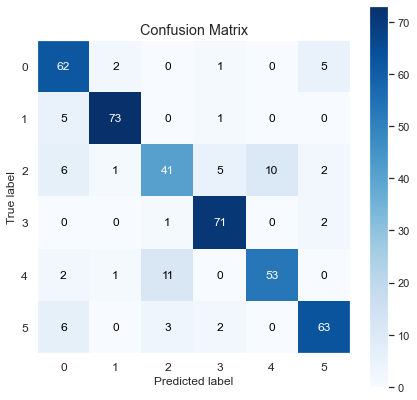

In [38]:
yhat_valid = model.predict_classes(X_test)
scikitplot.metrics.plot_confusion_matrix(np.argmax(y_test, axis=1), yhat_valid, figsize=(7,7))
plt.savefig("confusion_matrix_dcnn.png")

print(f'total wrong validation predictions: {np.sum(np.argmax(y_test, axis=1) != yhat_valid)}\n\n')
print(classification_report(np.argmax(y_test, axis=1), yhat_valid))